## CSV to `GeoDataFrame`
Let's start importing packages and updating viewing options:

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Display all columns when looking at dfs
pd.set_option('display.max.columns', None)

# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

power_plants = power_plants.drop(columns = 'Unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)
# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,       # DataFrame
                                geometry = points,   # Specify geometry column
                                crs = 'EPSG:4269')   # Specify CRS

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


In [4]:
print('CRS: ', power_plants.crs)
print('is CRS geographic: ', power_plants.crs.is_geographic)

CRS:  EPSG:4269
is CRS geographic:  True


<AxesSubplot:>

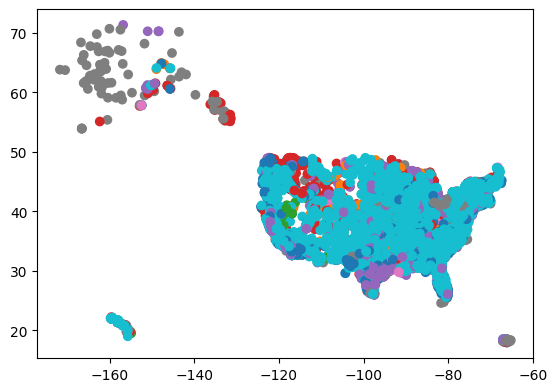

In [5]:
power_plants.plot(column = 'primsource')

## f strings
So far, we have printed variables using string concatenation inside the `print()` function: we use commas to separate every variable and string that we want to print. Example:

In [6]:
print('CRS :', power_plants.crs)

CRS : EPSG:4269


Another popular way to mix variables and strings in a print statement is by creating a **f-string**, stands for formatted string. 

The simplest syntax:
```python
f"some text {replace}"
```
Where `replace` can be a variable, na expression, a function or method call.
Example:

In [7]:
#Check what is the ellipsoid 
f"ellipsoid: {power_plants.crs.ellipsoid}"

'ellipsoid: GRS 1980'

In [8]:
# Use f strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


Advantages of using f-strings: a lot of customization for formtting output.

In [9]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


# Import the shapefile data

In [10]:
os.getcwd()

'/Users/bgrazda/MEDS/EDS-220/eds220-2024-in-class'

In [11]:
# Create absolute filepath to data
fp = os.path.join('/', 
                  'courses', 
                  'EDS220', 
                  'data',
                  'tl_2022_us_state',
                 'tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

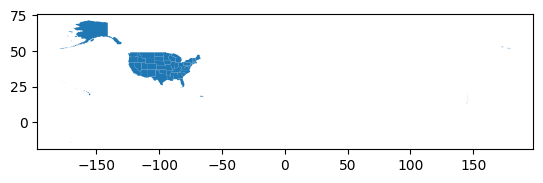

In [12]:
states.plot()

`for` loops

It can be easier to work with the codes as numbers instead of strings, let's update the corresponding columns in the geo-data frame: 
`region`, `division`, `statefp`

First thing, check if these are columns with strings: 

In [13]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This is inconvenient because it repeats the same piece of code, only changing the column name.
Instead, using a `for` loop allows to succinctly print the same info:

In [14]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, interating over a set of objects. In this case, we iterate over the list of column names.

**DRY code**
DRY = don't repeat yourself is a core programming principle that encourages reducing redundancy and consolidating repeated logic.
If you need to repeat the "same" code more than twice, you probably need a for loop.

Next, update data type of the code columns to be integers. 
This time, we verify the datatype of the column using the `is_numeric_dtype()` and `assert` statement

In [15]:
# Update code columns into integers
for columnin in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # Check conversion

The `assert` keyword does nothing if the expression next to it revaluates to `True`. 
If the expression evaluates to `False` then `assert` raises an `AssertionError` and stops your code from running.
Example:

In [16]:
# Does nothing if statmenet is true
assert 2 + 2 == 4


In [17]:
# raises an error if statement is false
#assert 2 +2 ==3

## Data selection

For this lesson, we want to use only the contiguous states. The `states` geodataframe covers a bigger extensio.

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

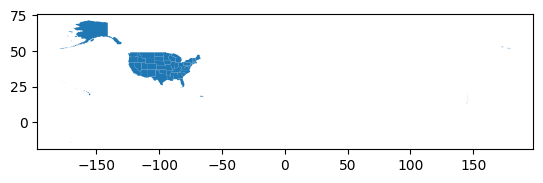

In [18]:
states.plot()

## Check in
- what are the unique values for region, diviion, or staet codes in the data
- which codes should we select to kepe only states in the contiguous US

In [19]:
code_col = ['region', 'division', 'statefp']

for col in code_col:
    print(f"unique values in {col}: {states[col].unique()}")
    
    

unique values in region: ['3' '2' '1' '4' '9']
unique values in division: ['5' '3' '4' '1' '8' '9' '2' '7' '6' '0']
unique values in statefp: [54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


Hawaii and Alaska have codes 2, 15, and then region 9 should be excluded

In [20]:
# Select contiguous US states
contiguous = states[(states.region!= 9) & (~states.statefp.isin([2,15]))]

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

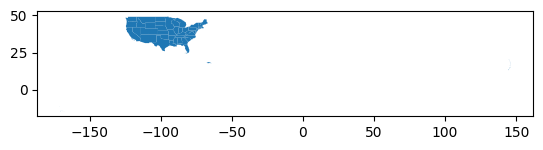

In [21]:
contiguous.plot()

The ~ tilde symbol is used in PYthon to negate a statement.
Select data in the `power_plants` data frame fro the contiguous US states.

In [22]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

## Plotting
Before we plot our data, let's make sure they are in the same CRS:

In [23]:
contiguous.crs == power_plants.crs

True

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


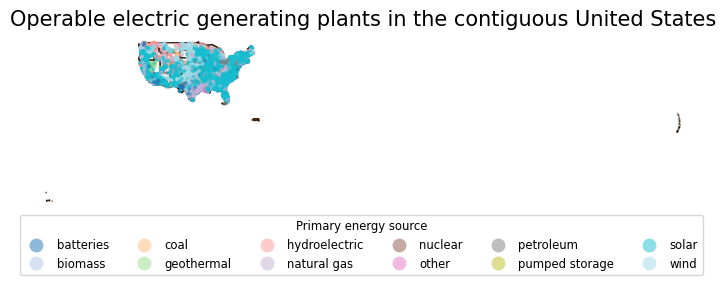

In [24]:
fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contiguous.plot(ax=ax,
               color='none',
               edgecolor='#362312')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource',
                  legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6  
                  })
                  
plt.show()

We controlled the legend location using `loc` and `bbox_to_anchor`

- `loc` indicates the corner of the legend we want to use for placement, and
- `bbox_to_anchor` is a tuple with coordinates indicating where to place the corner specified in loc relative to the axes. Values between 0 and 1 are within the axes.